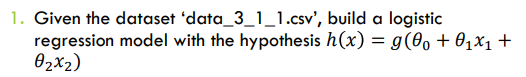

In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [61]:
data = pd.read_csv('data_3_1_1.csv').to_numpy()

In [62]:
data[:5]

array([[6.7 , 6.79, 1.  ],
       [6.92, 3.87, 1.  ],
       [7.87, 5.36, 1.  ],
       [2.93, 6.91, 0.  ],
       [6.67, 4.92, 1.  ]])

In [63]:
# [:] means all rows,
#[:, -1] means last element in all rows
#[:, :-1] means all rows with all elements in rows excepts last one( gives all except last colum)
# axis =0 means row-wise operation
# axis =1 means column-wise operation
X = data[:,:-1] 
y= data[:,-1] 
print(X.shape)
print(y.shape)
X.mean(axis=0)

(100, 2)
(100,)


array([4.8598, 6.0577])

<b>`Feature scalling`

In [64]:
def scale(X):
    return (X-X.mean(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [65]:
X_scaled = scale(X)
X_scaled[:5]

array([[ 0.22011962,  0.10184979],
       [ 0.24643541, -0.30426982],
       [ 0.36007177, -0.09703755],
       [-0.23083732,  0.11853964],
       [ 0.2165311 , -0.15823366]])

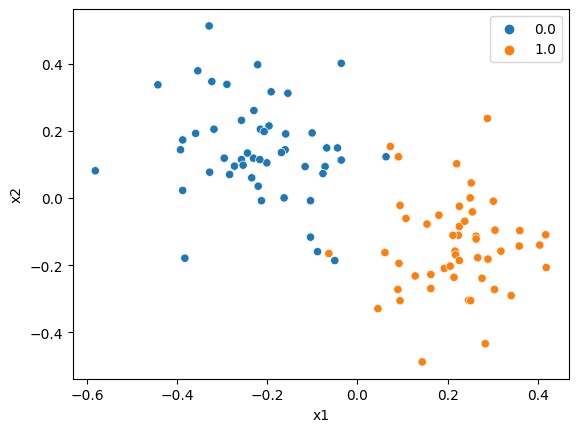

In [66]:
sns.scatterplot(x= X_scaled[:,0], y= X_scaled[:,1], hue =y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [67]:
x0 = np.ones((len(X),1))
X_new = np.concatenate((x0, X_scaled), axis=1)
X_new.shape

(100, 3)

In [68]:
def hyp(x, theta):
    z= np.matmul(x, theta)
    h= 1/(1+np.exp(-z))
    return h

theta = np.zeros((3,1))
print(hyp(X_new, theta))

[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


`Define cost function ask 3 argumens involving : x , theta , y`

In [69]:
def cost(x, theta, y):
    c = -y.reshape((-1,1))*np.log(hyp(x,theta))-(1-y.reshape((-1,1)))*np.log(1-hyp(x,theta))
    c= c.mean()
    return c
print (cost(X_new, theta, y))

0.6931471805599453


`Define gradient descending methos `

In [70]:
def grad(x, theta, y):
    g = (hyp(x,theta) - y.reshape((-1,1))) * x
    g = 2 * (g.mean(axis = 0))
    return g.reshape((-1,1))

print(grad(X_new, theta, y))

[[ 0.        ]
 [-0.21901914]
 [ 0.14404729]]


`Training data`

In [71]:
theta = np.zeros((3,1))
alpha = 10

for i in range (100):
    cost_value = cost(X_new, theta, y)
    theta += -alpha*grad(X_new, theta, y)
    print(cost_value)

0.6931471805599453
0.4198051359137389
0.31319522617096845
0.257876984750648
0.22368665849002112
0.20034677600890416
0.1833797084807854
0.17045407766429643
0.16006297285477217
0.1513164370218538
0.14367652192075117
0.1370413248911402
0.13130703335766114
0.12640214616668305
0.12216260690857997
0.11844316457569411
0.11512764633467208
0.11213816617097493
0.10942103906746169
0.10693677668930275
0.10465428206320194
0.10254813771336779
0.10059718334648463
0.09878361460799284
0.09709232889017089
0.09551042392050457
0.09402680546373475
0.09263187678512523
0.09131729051375677
0.09007574867228556
0.08890084024906679
0.08778690829518838
0.08672894043492066
0.08572247808779421
0.08476354075362588
0.08384856250605768
0.0829743384445158
0.08213797931819439
0.0813368728942479
0.08056865092172476
0.07983116076192126
0.07912244092889004
0.0784406999213512
0.07778429783717627
0.07715173034997416
0.07654161469871851
0.0759526773993612
0.07538374343472153
0.07483372671776753
0.07430162165538333
0.073786495

In [137]:
import math
import random

In [138]:
def tokenize(s):
    tokens = s.split(' ')
    return [t.rstrip('.') for t in tokens]

In [139]:
with open('SMSSpamCollection', 'r') as file:
    for i in range(40):
        line = file.readline().strip()
        print(line)

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam

In [140]:
import nltk
from nltk.tokenize import word_tokenize

D = []

with open('SMSSpamCollection', 'r') as file:
    for line in file:
        fields = line.strip('\n').split('\t')
        x = word_tokenize(fields[1])  # Tokenize the text using word_tokenize from NLTK
        y = 1 if fields[0] == 'spam' else 0
        D.append((x, y))


In [141]:
print("Number of data N=",len(D))
print("Example:",D[10])

Number of data N= 5574
Example: (['I', "'m", 'gon', 'na', 'be', 'home', 'soon', 'and', 'i', 'do', "n't", 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight', ',', 'k', '?', 'I', "'ve", 'cried', 'enough', 'today', '.'], 0)


In [142]:
import random
random.shuffle(D)
Dtrain = D[:5000]
Dtest = D[5000:]

Logistic Regression Model with Python

In [143]:
W = {}
for x, y in Dtrain:
    for a in x:
        W.setdefault(a, 0.)

In [144]:
def score(W, x):
  score_ = 0.
  for a in x:
    score_ += W.get(a, 0.)
  return score_

In [145]:
def sigmoid(a):
    if 0 <= a:
        return 1 / (1 + math.exp(-a))
    else:
        return 1. - 1 / (1 + math.exp(a))

In [146]:
eta = 0.1
for t in range(1000):
    loss = 0.
    for x, y in Dtrain:
        pi = sigmoid(score(W, x))
        for a in x:
            W[a] += eta * (y - pi)

In [147]:
def accuracy(W, Dtest):
    n = 0
    for x, y in Dtest:
      if score(W, x) > 0:
        n += y
      else:
        n += 1-y
    return n / len(Dtest)

In [148]:
print(accuracy(W, Dtest))

0.9738675958188153


In [149]:
F = sorted(W.items(), key=lambda x:x[1])

In [150]:
F[:20] # words can be easily identified as spam mail 

[('Ok', -6.476334503893027),
 ('Yup', -5.90589121965492),
 ('Okie', -5.699980719742306),
 ('...', -5.529214373035897),
 ('me', -5.180763576116067),
 ('nice', -5.034016367351411),
 (';', -4.935840096316446),
 ('Waiting', -4.902487473974016),
 ('ALRITE', -4.573819613538929),
 ('staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323', -4.570827983667447),
 ('645', -4.570827983667447),
 ('G.W.R', -4.570827983667447),
 ('Happy', -4.501467866047969),
 ('I', -4.297116359000352),
 ('Its', -4.188505262496758),
 ('Have', -4.185187694262547),
 ('good', -4.159517785170687),
 ('..', -4.083570853951142),
 ('later', -4.061790398156729),
 ('my', -4.048408788380047)]

In [151]:
F[-20:] # words can not be easily identified as spam mail 

[('Day', 3.8553612259864942),
 ('reply', 3.9140808508487286),
 ('mobile', 3.9802815145613737),
 ('NOW', 4.040454086645635),
 ('truly', 4.13543828276194),
 ('To', 4.175072389796939),
 ('18', 4.504117511856688),
 ('won', 4.599162352835578),
 ('txt', 4.609607752446458),
 ('FREE', 4.8638951585541),
 ('text', 5.000204359326222),
 ('Â£1.50', 5.108100326734515),
 ('order', 5.58302523989266),
 ('STOP', 5.586616139091952),
 ('07090201529', 5.761467728342055),
 ('Reply', 5.7637449665302825),
 ('http', 6.081924467666513),
 ('Text', 6.3053730185615064),
 ('Call', 6.347361661667229),
 ('Txt', 7.248671162338671)]